In [1]:
import pandas as pd

In [2]:
employee = pd.read_csv("employees.csv")

In [3]:
salaries = pd.read_csv("salaries.csv")

In [4]:
employee.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991


In [5]:
len(employee)

300024

In [9]:
employee_salaries = employee.merge(salaries, on="emp_no")

# 1. List the following details of each employee: employee number, last name, first name, sex, and salary.

In [10]:
employee_salaries.loc[:, ["emp_no", "last_name", "first_name", "sex", "salary"]]

,emp_no,last_name,first_name,sex,salary
0,473302,Zallocco,Hideyuki,M,40000
1,475053,Delgrande,Byong,F,53422
2,57444,Babb,Berry,F,48973
3,421786,Verhoeff,Xiong,M,40000
4,282238,Baumann,Abdelkader,F,40000
...,...,...,...,...,...
300019,464231,Eastman,Constantino,M,69696
300020,255832,Dayang,Yuping,F,75355
300021,76671,Plessier,Ortrud,M,61886
300022,264920,Samarati,Percy,F,62772


# 2. List first name, last name, and hire date for employees who were hired in 1986

In [22]:
regex = ".*1986"

In [23]:
employee_salaries[employee_salaries["hire_date"].str.match(regex)]

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
5,263976,e0003,10/30/1959,Eran,Cusworth,M,11/14/1986,40000
14,21529,e0002,5/19/1959,Bojan,Zallocco,M,10/14/1986,40000
19,205246,s0002,11/25/1958,Nevio,Demizu,F,5/18/1986,80252
29,61583,e0003,6/4/1957,Ziva,Vecchi,M,7/3/1986,50801
33,422587,e0003,7/3/1954,Mohit,Speek,F,1/14/1986,40000
...,...,...,...,...,...,...,...,...
299986,32348,s0002,8/16/1964,Uriel,Heijenga,F,6/30/1986,67275
299998,248234,s0001,2/5/1955,Ziyad,Constantine,M,2/28/1986,40000
300006,268515,s0001,11/12/1961,Yishay,Maksimenko,F,1/27/1986,80861
300007,473844,s0001,3/28/1962,Yannik,Ranai,M,4/6/1986,40000


# 3. List the manager of each department with the followinf information: department number, department name, the manager's employee number, last name, first name.

In [24]:
dept_manager = pd.read_csv("dept_manager.csv")

In [25]:
dept_name = pd.read_csv("departments.csv")

In [26]:
dept_name

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [27]:
dept_manager_info = dept_manager.merge(dept_name, on="dept_no")

In [28]:
dept_manager_info

,dept_no,emp_no,dept_name
0,d001,110022,Marketing
1,d001,110039,Marketing
2,d002,110085,Finance
3,d002,110114,Finance
4,d003,110183,Human Resources
5,d003,110228,Human Resources
6,d004,110303,Production
7,d004,110344,Production
8,d004,110386,Production
9,d004,110420,Production


In [33]:
dept_manager_info = dept_manager_info.merge(employee[["emp_no", "last_name", "first_name"]], on="emp_no")

In [42]:
dept_manager_info[["dept_no", "dept_name", "emp_no", "last_name", "first_name"]]

,dept_no,dept_name,emp_no,last_name,first_name
0,d001,Marketing,110022,Markovitch,Margareta
1,d001,Marketing,110039,Minakawa,Vishwani
2,d002,Finance,110085,Alpin,Ebru
3,d002,Finance,110114,Legleitner,Isamu
4,d003,Human Resources,110183,Ossenbruggen,Shirish
5,d003,Human Resources,110228,Sigstam,Karsten
6,d004,Production,110303,Wegerle,Krassimir
7,d004,Production,110344,Cools,Rosine
8,d004,Production,110386,Kieras,Shem
9,d004,Production,110420,Ghazalie,Oscar


#  4. List the department of each employee with the following information: employee number, last name, first name, and department name.

In [35]:
employee_department = pd.read_csv("dept_emp.csv")

In [36]:
employee_department

,emp_no,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003
...,...,...
331598,499995,d004
331599,499996,d004
331600,499997,d005
331601,499998,d002


In [37]:
employee_department = employee_department.merge(dept_name, on="dept_no")

In [38]:
employee_department

,emp_no,dept_no,dept_name
0,10001,d005,Development
1,10006,d005,Development
2,10008,d005,Development
3,10012,d005,Development
4,10014,d005,Development
...,...,...,...
331598,499950,d002,Finance
331599,499975,d002,Finance
331600,499977,d002,Finance
331601,499989,d002,Finance


In [39]:
employee_department_info = employee_department.merge(employee[["emp_no", "last_name", "first_name"]], on="emp_no")

In [43]:
employee_department_info[["emp_no", "last_name", "first_name", "dept_name"]]

,emp_no,last_name,first_name,dept_name
0,10001,Facello,Georgi,Development
1,10006,Preusig,Anneke,Development
2,10008,Kalloufi,Saniya,Development
3,10012,Bridgland,Patricio,Development
4,10014,Genin,Berni,Development
...,...,...,...,...
331598,499873,Picel,Kasidit,Finance
331599,499950,Gente,Weidon,Finance
331600,499977,Weisert,Martial,Finance
331601,499989,Lindqvist,Keiichiro,Finance


# 5. List first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B."

In [45]:
employee[(employee["first_name"] == "Hercules") & employee["last_name"].str.match("B.*")]

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
4218,38161,s0001,10/12/1964,Hercules,Baer,M,2/17/1988
15577,276181,s0001,10/17/1957,Hercules,Biron,F,12/7/1994
21897,236650,e0002,12/24/1964,Hercules,Birge,F,4/13/1994
30877,482148,e0003,4/5/1954,Hercules,Berstel,F,11/2/1989
45926,210097,e0003,8/27/1954,Hercules,Bernatsky,M,11/27/1985
52269,213553,e0003,8/14/1961,Hercules,Bail,F,6/16/1987
66260,250175,s0001,2/13/1959,Hercules,Bodoff,M,9/14/1985
66852,461517,s0001,7/20/1963,Hercules,Benantar,F,6/8/1989
78130,89844,e0002,3/1/1954,Hercules,Basagni,M,10/25/1991
95208,89382,s0001,9/3/1964,Hercules,Bernardinello,F,2/13/1987


# 6. List all employees in the Sales department, including their employee number, last name, first name, and department name

In [46]:
employee_department_info[employee_department_info["dept_name"] == "Sales"][["emp_no", "last_name", "first_name", "dept_name"]]

,emp_no,last_name,first_name,dept_name
97114,10002,Simmel,Bezalel,Sales
97115,10016,Cappelletti,Kazuhito,Sales
97116,10034,Swan,Bader,Sales
97117,10041,Lenart,Uri,Sales
97118,10050,Dredge,Yinghua,Sales
...,...,...,...,...
156453,499976,Felder,Guozhong,Sales
156454,499980,Usery,Gino,Sales
156455,499986,Ranta,Nathan,Sales
156456,499987,Dusink,Rimli,Sales


# 7. List all employees in the Sales and Development departments, including their employee number, last name, first name, and department name.

In [47]:
condition = (employee_department_info["dept_name"] == "Sales") | (employee_department_info["dept_name"] == "Development")

In [48]:
employee_department_info[condition][["emp_no", "last_name", "first_name", "dept_name"]]

,emp_no,last_name,first_name,dept_name
0,10001,Facello,Georgi,Development
1,10006,Preusig,Anneke,Development
2,10008,Kalloufi,Saniya,Development
3,10012,Bridgland,Patricio,Development
4,10014,Genin,Berni,Development
...,...,...,...,...
156453,499976,Felder,Guozhong,Sales
156454,499980,Usery,Gino,Sales
156455,499986,Ranta,Nathan,Sales
156456,499987,Dusink,Rimli,Sales


# 8. In descending order, list the frequency count of employee last names, i.e., how many employees share each last name

In [49]:
employee["last_name"].value_counts()

Baba          226
Gelosh        223
Coorg         223
Farris        222
Sudbeck       222
             ... 
Georgatos     148
Guardalben    148
Merro         147
Sadowsky      145
Foolsday        1
Name: last_name, Length: 1638, dtype: int64

# BONUS

# 2. Create a histogram to visualize the most common salary ranges for employees

In [64]:
import numpy as np

In [65]:
count, division = np.histogram(employee_salaries["salary"])

In [66]:
count

array([151743,  53779,  41098,  27313,  15565,   7209,   2487,    669,
          143,     18], dtype=int64)

In [67]:
division

array([ 40000. ,  48949.2,  57898.4,  66847.6,  75796.8,  84746. ,
        93695.2, 102644.4, 111593.6, 120542.8, 129492. ])

<AxesSubplot:>

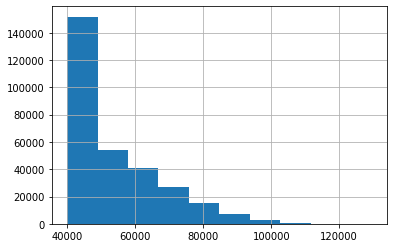

In [69]:
employee_salaries["salary"].hist()

# 3. Create a bar chart of average salary by title.

In [70]:
title = pd.read_csv("titles.csv")

In [75]:
title

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [60]:
emp_title_mean = employee_salaries.groupby("emp_title_id").mean()["salary"]

In [74]:
emp_title_mean = emp_title_mean.to_frame()

In [79]:
emp_title_mean.rename(columns={"emp_title_id" : "title_id"})

,salary
emp_title_id,
e0001,48564.434447
e0002,48535.336511
e0003,48506.799871
e0004,48582.896092
m0001,51531.041667
s0001,58465.382850
s0002,58550.172704


In [76]:
emp_title_mean = emp_title_mean.merge(title, on="title_id")

KeyError: 'title_id'

<AxesSubplot:xlabel='emp_title_id'>

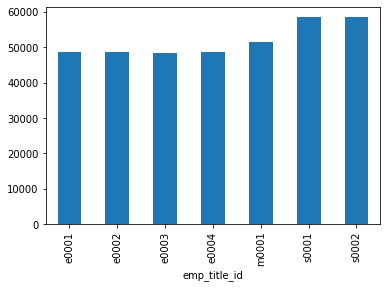

In [63]:
emp_title_mean.plot.bar()